# Second order

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import fem
from scipy.sparse.linalg import svds

In [103]:
n, m, degs = 2, 3, [1,2]
par = fem.simulate.model_parameters(n, m, degs)

In [104]:
x = fem.simulate.time_series(par, n, m, o=1.0)

In [105]:
x1, cat_x1 = fem.fit.categorize(x[:,:-1])
x2, cat_x2 = fem.fit.categorize(x[:,1:])
m_x1 = np.array([len(c) for c in cat_x1])
m_x2 = np.array([len(c) for c in cat_x2])
n_x1 = x1.shape[0]
n_x2 = x2.shape[0]
x_oh, idx = fem.fit.one_hot(x, degs)
x1_oh, idx1 = fem.fit.one_hot(x1, degs)
x2_oh, idx2 = fem.fit.one_hot(x2, degs)

In [106]:
print x.mean(1)
print np.all(x1 == x[:,:-1])
print np.all(x2 == x[:,1:])
print m_x1
print m_x2
print n_x1
print n_x2
print x1[:,0]+1
print x1_oh[:,0].todense().T
print x1[:,1]+1
print x1_oh[:,1].todense().T
print x2[:,10]+1
print x2_oh[:,10].todense().T
print x2[:,11]+1
print x2_oh[:,11].todense().T
print x_oh.shape
print x1_oh.shape
print x2_oh.shape
print np.linalg.matrix_rank(x_oh.todense())
print np.linalg.matrix_rank(x1_oh.todense())
print np.linalg.matrix_rank(x2_oh.todense())
print svds(x_oh, k=np.linalg.matrix_rank(x_oh.todense()))[1].min()
print svds(x_oh, k=np.linalg.matrix_rank(x_oh.todense()))[1].max()
print svds(x1_oh, k=np.linalg.matrix_rank(x1_oh.todense()))[1].min()
print svds(x1_oh, k=np.linalg.matrix_rank(x1_oh.todense()))[1].max()
print svds(x2_oh, k=np.linalg.matrix_rank(x2_oh.todense()))[1].min()
print svds(x2_oh, k=np.linalg.matrix_rank(x2_oh.todense()))[1].max()


[0.96666667 1.14444444]
True
True
[3 3]
[3 3]
2
2
[1 3]
[[1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3 2]
[[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[1 3]
[[1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3 2]
[[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(15, 90)
(15, 89)
(15, 89)
9
9
9
2.6524146906472104
8.708227877456267
2.647135483393483
8.68552365967736
2.652411497382811
8.632496482340432


In [107]:
x1, x2 = x[:,:-1], x[:,1:]
par_fit, disc = fem.fit.fit(x1, x2, degs, iters=50)

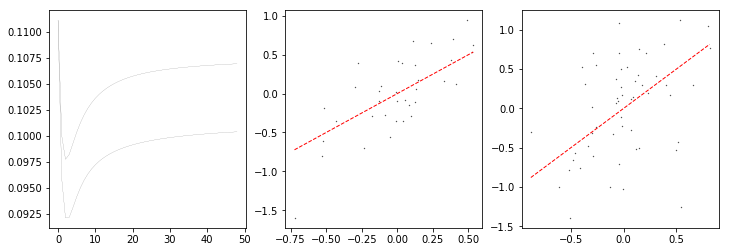

In [108]:
fig, ax = plt.subplots(1, 1+len(degs), figsize=(4*(1+len(degs)),4))

for d in disc:
    ax[0].plot(d, 'k-', lw=0.1)

for i,a in enumerate(ax[1:]):
    par_flat = par[degs[i]][:,:].flatten()
    par_fit_flat = par_fit[degs[i]][:,:].flatten()
    lo, hi = par_flat.min(), par_flat.max()
    grid = np.linspace(lo, hi)
    a.plot(grid, grid, 'r--', lw=1)
    a.scatter(par_flat, par_fit_flat, c='k', s=0.1)

plt.show()

In [6]:
# print 'par[2] shape', par[2].shape
# print 'par_fit[2] shape', par_fit[2].shape

# m1 = 0
# for i in range(1, par[2].shape[0]):
#     if np.all(np.isclose(par[2][m1:i].sum(0), 0)):
#         print 'colsums par', i
#         m2 = i
#         par_fit[2][m1:m2] -= par_fit[2][m1:m2].mean(0)
#         m1 = m2       
#     if np.all(np.isclose(par_fit[2][m1:i].sum(0), 0)):
#         print 'colsums par_fit', i

# m1 = 0
# for i in range(1, par[2].shape[1]):
#     if np.all(np.isclose(par[2][:,m1:i].sum(1), 0)):
#         print 'rowsums par', i
#         m2 = i
#         par_fit[2][:,m1:m2] -= par_fit[2][:,m1:m2].mean(1)[:,np.newaxis]
#         m1 = m2
#     if np.all(np.isclose(par_fit[2][:,m1:i].sum(1), 0)):
#         print 'rowsums par_fit', i

In [7]:
# fig, ax = plt.subplots(1, 1+len(degs), figsize=(4*(1+len(degs)),4))

# for d in disc:
#     ax[0].plot(d, 'k-', lw=0.1)

# for i,a in enumerate(ax[1:]):
#     par_flat = par[degs[i]][:,:].flatten()
#     par_fit_flat = par_fit[degs[i]][:,:].flatten()
#     lo, hi = par_flat.min(), par_flat.max()
#     grid = np.linspace(lo, hi)
#     a.plot(grid, grid, 'r--', lw=1)
#     a.scatter(par_flat, par_fit_flat, c='k', s=0.1)

# plt.show()

In [8]:
# for i in range(par[2].shape[1]):
#     if np.all(np.isclose(par[2][:i].sum(0), 0)):
#         print 'par', i
#     if np.all(np.isclose(par_fit[2][:i].sum(0), 0)):
#         print 'par_fit', i

In [9]:
# m1 = 0
# for i in range(1, par[2].shape[1]):
#     if np.all(np.isclose(par[2][:,:i].sum(1), 0)):
#         print 'par', i
#         m2 = i
#         par_fit[2][:,m1:m2] -= par_fit[2][:,m1:m2].mean(1)[:,np.newaxis]
#         m1 = m2
#     if np.all(np.isclose(par_fit[2][:,:i].sum(1), 0)):
#         print 'par_fit', i